### Author: Makayla McKibben
## Course: DSC 550 Data Mining
## Date: 09.29.2024
## Exercise: Ex. 5.2

In [2]:
# Import relevant libraries and modules
import pandas as pd
import numpy as np
import seaborn as sns
import string
import nltk
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\makay\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\makay\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [4]:
from textblob import TextBlob

## Part 1 Getting the Stemmed Reviews

In [6]:
# Read the file into a dataframe
movie_reviews = pd.read_csv('labeledTrainData.tsv', sep = '\t')

In [7]:
# Define the function to make all text lowercase
def lowercase(text):
    return text.lower()

In [8]:
# Apply the lowercase function
movie_reviews['processed_text'] = movie_reviews['review'].apply(lowercase)

In [9]:
# Define the function to remove punctuation
def remove_punc(text):
    text = text.translate(str.maketrans('', '', string.punctuation))
    return text

In [10]:
# Apply function that removes punctuation
movie_reviews['processed_text'] = movie_reviews['processed_text'].apply(remove_punc)

In [11]:
# Set up the stop words values
stop_words = stopwords.words('english')

In [12]:
# Define the function that removes the stop words from the text
def remove_stop_words(text):
    tokenized_words = word_tokenize(text)
    no_stops = [word for word in tokenized_words if word not in stop_words]
    return no_stops

In [13]:
# Remove the stop words
movie_reviews['processed_text'] = movie_reviews['processed_text'].apply(remove_stop_words)

In [14]:
# Set up stem function
porter = PorterStemmer()

In [15]:
# Define stemming function
def stems(list_of_words):
    stemmed = [porter.stem(word) for word in list_of_words]
    return stemmed

In [16]:
# Apply stem function
movie_reviews['stemmed_text'] = movie_reviews['processed_text'].apply(stems)

In [17]:
# Look at the processed reviews
movie_reviews['stemmed_text'].head()

0    [stuff, go, moment, mj, ive, start, listen, mu...
1    [classic, war, world, timothi, hine, entertain...
2    [film, start, manag, nichola, bell, give, welc...
3    [must, assum, prais, film, greatest, film, ope...
4    [superbl, trashi, wondrous, unpretenti, 80, ex...
Name: stemmed_text, dtype: object

In [18]:
# Join reviews into a single string for each row
movie_reviews['stemmed_text'] = movie_reviews['stemmed_text'].apply(lambda lst: " ". join(lst))

## Part 2 Fit and Test Logistic Regression

In [20]:
# Set the features and target for the model
target = movie_reviews['sentiment']
movie_reviews.drop('sentiment', axis = 1, inplace = True)
features = movie_reviews['stemmed_text']

In [21]:
# Split the data into training and test sets
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size = 0.2, random_state = 18)

In [22]:
# Define the term frequency-inverse document frequency (tf-idf) 
tfidf = TfidfVectorizer()

In [23]:
# Vectorize training data
training_vector = tfidf.fit_transform(features_train)

In [24]:
# Verify shape
training_vector

<20000x81063 sparse matrix of type '<class 'numpy.float64'>'
	with 1955512 stored elements in Compressed Sparse Row format>

In [25]:
# Vectorize test set
test_vector = tfidf.transform(features_test)

We do not fit the test data so that our test data are still unknown, not part of the model.

In [27]:
# Verify Shape
test_vector

<5000x81063 sparse matrix of type '<class 'numpy.float64'>'
	with 471569 stored elements in Compressed Sparse Row format>

In [28]:
# Create logistic regression object
logreg = LogisticRegression()

In [29]:
# Fit the model to the training data
logreg.fit(training_vector, target_train)

LogisticRegression()

In [30]:
# Predict target test values
log_pred_test = logreg.predict(test_vector)

In [31]:
# Add components so we can check accuracy
test_logreg_acc = target_test + log_pred_test

In [32]:
# Create confusion matrix
test_logreg_confusion = confusion_matrix(target_test, log_pred_test)

In [33]:
# Create df from confusion matrix
test_logreg_df = pd.DataFrame(test_logreg_confusion)

<function matplotlib.pyplot.show(close=None, block=None)>

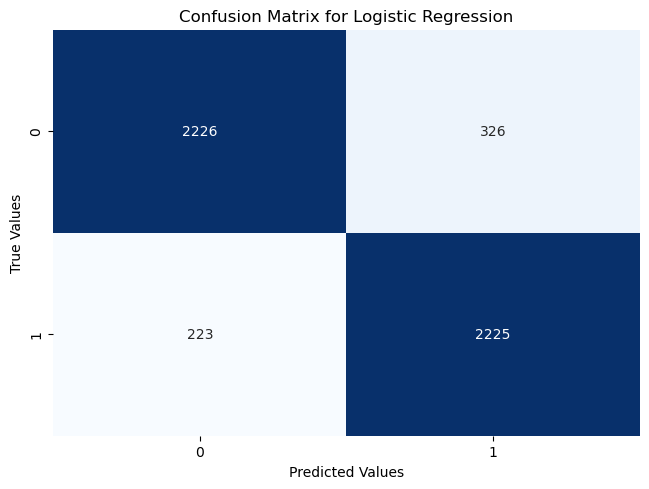

In [34]:
# Plot confusion matrix
sns.heatmap(test_logreg_df, annot = True, cbar = None, cmap = 'Blues', fmt = 'g')
plt.title('Confusion Matrix for Logistic Regression') 
plt.tight_layout()
plt.ylabel('True Values')
plt.xlabel('Predicted Values')
plt.show

In [35]:
# Tally up values that are 0
zero_values_logreg = test_logreg_acc[(test_logreg_acc == 0)].count()

In [36]:
# Tally up values that are 2
two_values_logreg = test_logreg_acc[(test_logreg_acc == 2)].count()

In [37]:
# Find logistic regression precision
test_logreg_precision = 2225 / (2225 + 326)

In [38]:
# Find logistic regression recall
test_logreg_recall = 2225 / (2225 + 223)

In [39]:
# Find Logistic regression f1
test_logreg_f1 = 2 * (test_logreg_precision * test_logreg_recall) / (test_logreg_precision + test_logreg_recall)

In [40]:
# Print stats
print('Accuracy is: ', ((zero_values_logreg + two_values_logreg)/len(test_logreg_acc)*100), '%')
print('Precision is: ', round(test_logreg_precision, 2))
print('Recall is: ', round(test_logreg_recall, 2))
print('F1-score is: ', round(test_logreg_f1, 2))

Accuracy is:  89.02 %
Precision is:  0.87
Recall is:  0.91
F1-score is:  0.89


In [41]:
# Find probabilities for test vector
target_logreg_prob = logreg.predict_proba(test_vector)[:, 1]

In [42]:
# Find ROC curve
false_pos_rate_logreg, true_pos_rate_logreg, threshold_logreg = roc_curve(target_test, target_logreg_prob)

<function matplotlib.pyplot.show(close=None, block=None)>

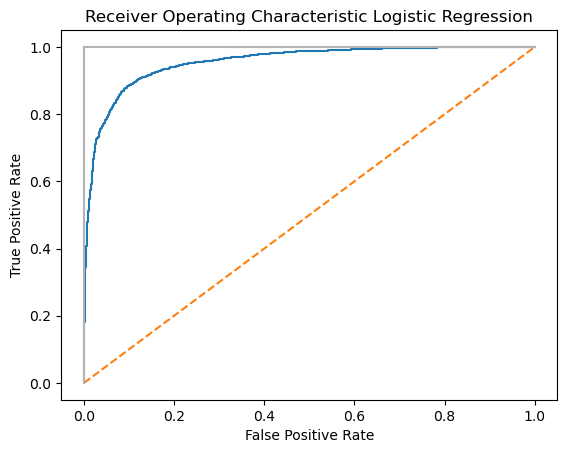

In [43]:
# Plot ROC curve
plt.title('Receiver Operating Characteristic Logistic Regression')
plt.plot(false_pos_rate_logreg, true_pos_rate_logreg)
plt.plot([0, 1], ls = '--')
plt.plot([0, 0], [1, 0], c = '0.7')
plt.plot([1, 1], c = '0.7')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show

## Part 3 Fit and Test Random Forest Model

In [45]:
# Create random forest classifier object
randomforest = RandomForestClassifier(random_state = 18, n_jobs = -1)

In [46]:
# Fit random forest to training data
forest_rand = randomforest.fit(training_vector, target_train)

In [47]:
# Predict test results from random forest
forest_test_pred = forest_rand.predict(test_vector)

In [48]:
# Add components so we can check accuracy
forest_test_acc = forest_test_pred + target_test

In [49]:
# Create confusion matrix from random forest results
forest_confusion = confusion_matrix(target_test, forest_test_pred)

In [50]:
# Create dataframe from confusion matrix
forest_test_df = pd.DataFrame(forest_confusion)

<function matplotlib.pyplot.show(close=None, block=None)>

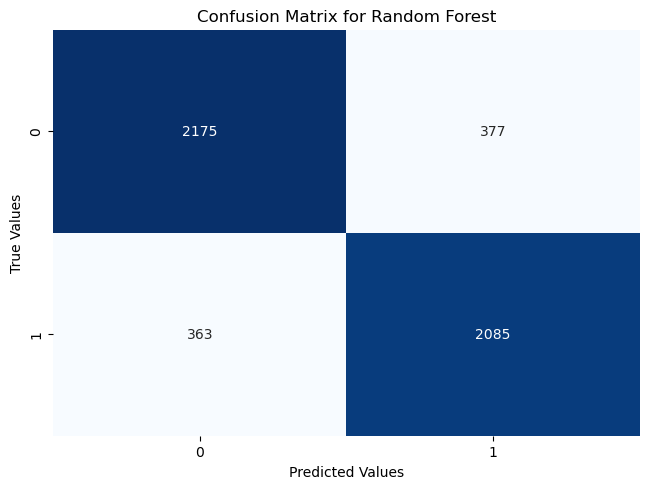

In [51]:
# Plot confusion matrix
sns.heatmap(forest_test_df, annot = True, cbar = None, cmap = 'Blues', fmt = 'g')
plt.title('Confusion Matrix for Random Forest') 
plt.tight_layout()
plt.ylabel('True Values')
plt.xlabel('Predicted Values')
plt.show

In [52]:
# Find all values of 0 for random forest
zero_values_forest = forest_test_acc[(forest_test_acc == 0)].count()

In [53]:
# Find all values of 2 for random forest
two_values_forest = forest_test_acc[(forest_test_acc == 2)].count()

In [54]:
# Find precision of random forest
forest_precision = 2085 / (2085 + 377)

In [55]:
# Find recall for random forest
forest_recall = 2085 / (2085 + 363)

In [56]:
# Find f1 for random forest
forest_f1 = 2 * (forest_precision * forest_recall) / (forest_precision + forest_recall)

In [57]:
# Print stats
print('Accuracy is: ', ((zero_values_forest + two_values_forest)/len(forest_test_acc)*100), '%')
print('Precision is: ', round(forest_precision, 2))
print('Recall is: ', round(forest_recall, 2))
print('F1-score is: ', round(forest_f1, 2))

Accuracy is:  85.2 %
Precision is:  0.85
Recall is:  0.85
F1-score is:  0.85


In [58]:
# Find probabilities from test vector for random forest model
forest_target_prob = forest_rand.predict_proba(test_vector)[:, 1]

In [59]:
# Find ROC curve
forest_false_pos_rate, true_pos_rate_forest, threshold_forest = roc_curve(target_test, forest_target_prob)

<function matplotlib.pyplot.show(close=None, block=None)>

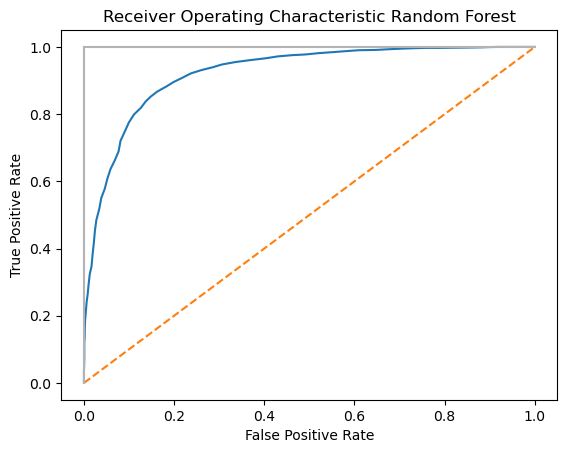

In [60]:
# Plot ROC curve
plt.title('Receiver Operating Characteristic Random Forest')
plt.plot(forest_false_pos_rate, true_pos_rate_forest)
plt.plot([0, 1], ls = '--')
plt.plot([0, 0], [1, 0], c = '0.7')
plt.plot([1, 1], c = '0.7')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show

## Part 4 Compare ROC

<function matplotlib.pyplot.show(close=None, block=None)>

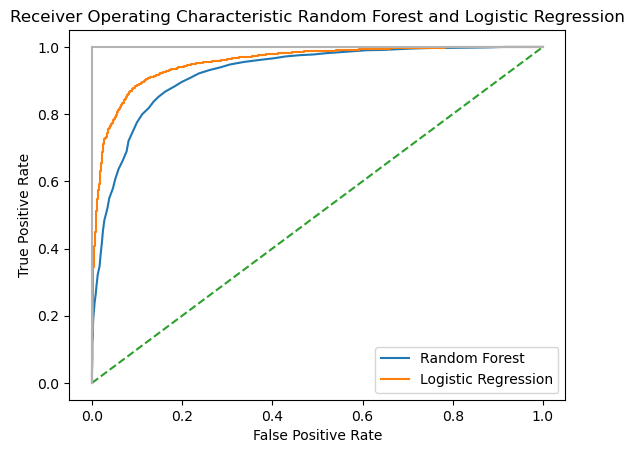

In [62]:
# Create one plot for both ROC curves to compare
plt.title('Receiver Operating Characteristic Random Forest and Logistic Regression')
plt.plot(forest_false_pos_rate, true_pos_rate_forest, label = 'Random Forest')
plt.plot(false_pos_rate_logreg, true_pos_rate_logreg, label = 'Logistic Regression')
plt.plot([0, 1], ls = '--')
plt.plot([0, 0], [1, 0], c = '0.7')
plt.plot([1, 1], c = '0.7')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show